In [3]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

import env
import wrangle
import explore

In [4]:
df = wrangle.wrangle_zillow()
df.head()

,bedrooms,bathrooms,area,tax_value,yearbuilt,taxamount,fips
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
18,3.0,1.0,1244.0,169471.0,1950.0,2532.88,6037.0
19,3.0,2.0,1300.0,233266.0,1950.0,3110.99,6037.0
20,3.0,2.0,1222.0,290492.0,1951.0,3870.25,6037.0


In [5]:
df.isnull().any()

bedrooms     False
bathrooms    False
area         False
tax_value    False
yearbuilt    False
taxamount    False
fips         False
dtype: bool

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1854411 entries, 6 to 2152863
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   bedrooms   float64
 1   bathrooms  float64
 2   area       float64
 3   tax_value  float64
 4   yearbuilt  float64
 5   taxamount  float64
 6   fips       float64
dtypes: float64(7)
memory usage: 113.2 MB


In [7]:
train, validate, test = wrangle.my_train_test_split(df)

train.shape, validate.shape, test.shape

((1038469, 7), (445059, 7), (370883, 7))

In [8]:
samp_train = train.sample(frac=.083)

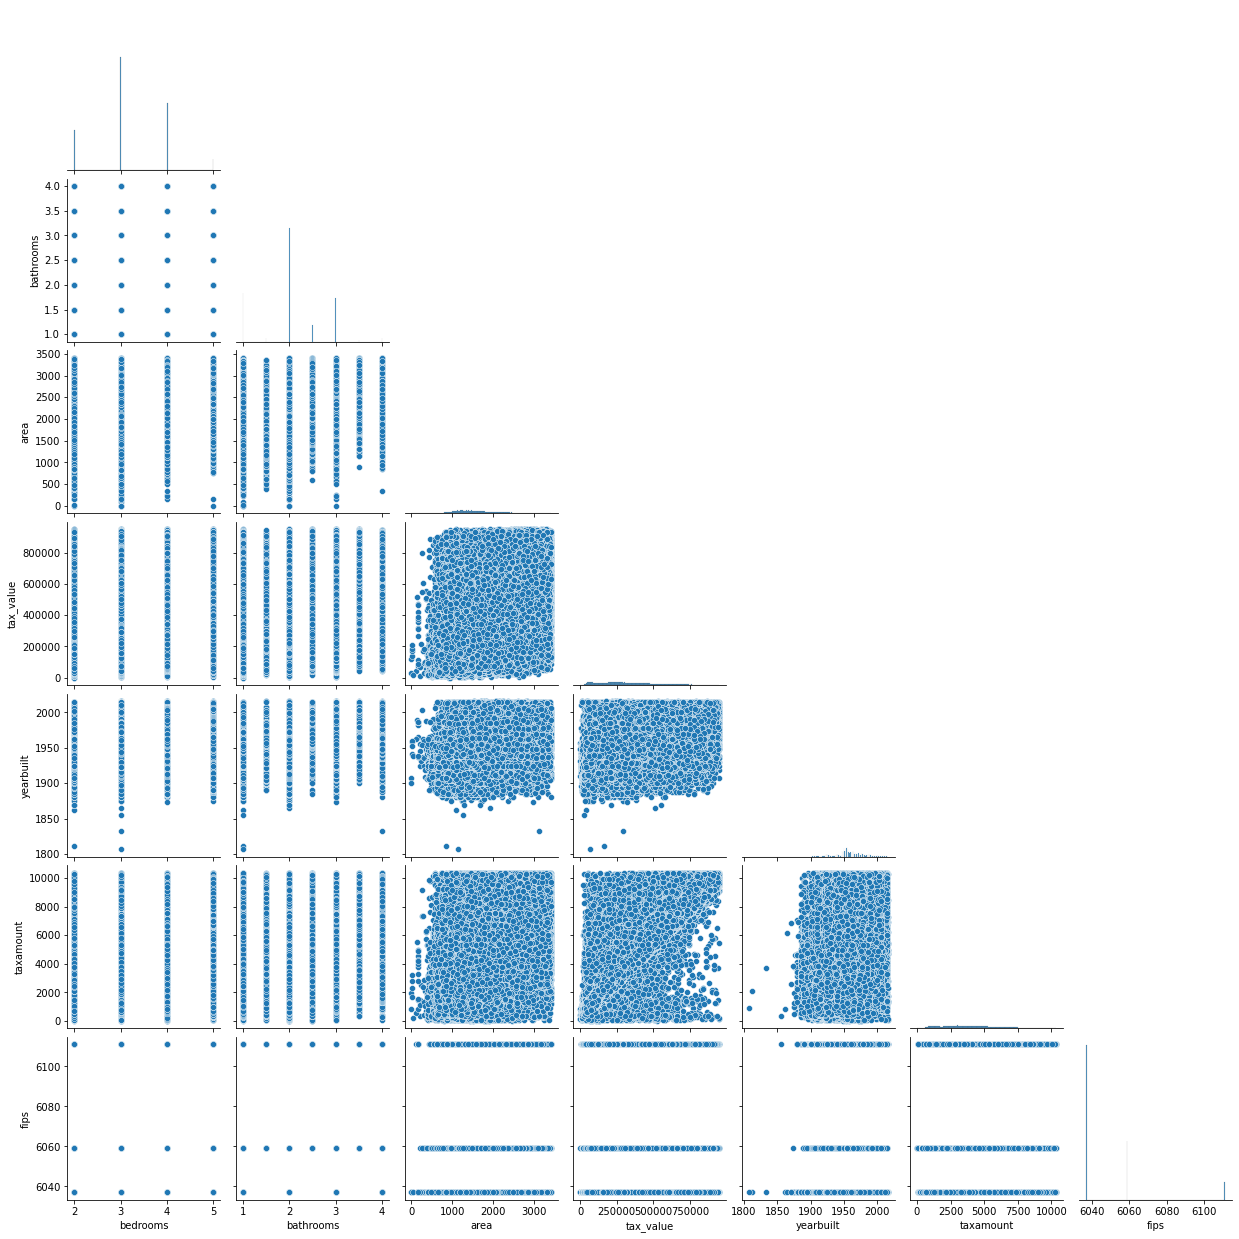

In [30]:
sns.pairplot(data=train, corner=True)
plt.show()

In [9]:
train.columns

Index(['bedrooms', 'bathrooms', 'area', 'tax_value', 'yearbuilt', 'taxamount',
       'fips'],
      dtype='object')

In [10]:
cat_col = ['bedrooms', 'bathrooms']
num_col = ['area', 'tax_value', 'taxamount']

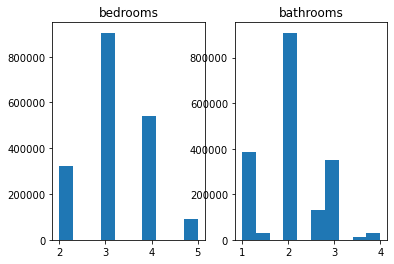

In [11]:
for i, col in enumerate(cat_col):
    # i starts at 0, but plot nos should start at 1
    subplot_num = i+1
    # Create subplot.
    plt.subplot(1,2,subplot_num)
    # Title with column name.
    plt.title(col)
    # Display histogram for column.
    df[col].hist()
    # Hide gridlines.
    plt.grid(False)

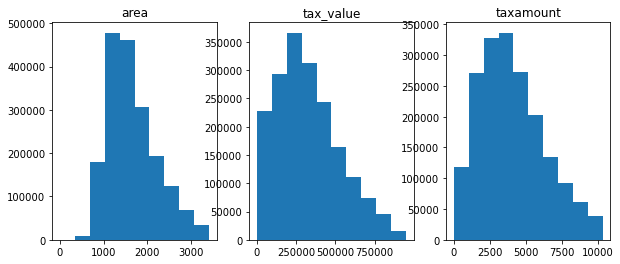

In [12]:
plt.figure(figsize=(10,4))
for i, col in enumerate(num_col):
    # i starts at 0, but plot nos should start at 1
    subplot_num = i+1
    # Create subplot.
    plt.subplot(1,3,subplot_num)
    # Title with column name.
    plt.title(col)
    # Display histogram for column.
    df[col].hist()
    # Hide gridlines.
    plt.grid(False)

In [13]:
zillow_corr = train.corr(method='spearman')

In [14]:
zillow_corr

,bedrooms,bathrooms,area,tax_value,yearbuilt,taxamount,fips
bedrooms,1.000000,0.578615,0.608283,0.200071,0.413447,0.199988,0.190922
bathrooms,0.578615,1.000000,0.778327,0.354014,0.574660,0.351275,0.207072
area,0.608283,0.778327,1.000000,0.391708,0.495441,0.386348,0.202060
tax_value,0.200071,0.354014,0.391708,1.000000,0.245634,0.973112,0.170568
yearbuilt,0.413447,0.574660,0.495441,0.245634,1.000000,0.240667,0.416601
taxamount,0.199988,0.351275,0.386348,0.973112,0.240667,1.000000,0.092522
fips,0.190922,0.207072,0.202060,0.170568,0.416601,0.092522,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

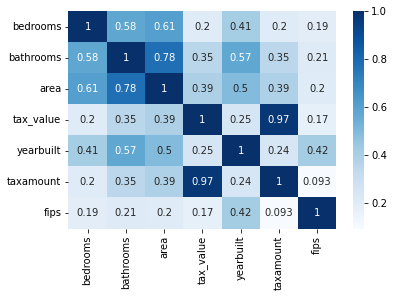

In [15]:
sns.heatmap(zillow_corr, cmap='Blues', annot=True)
plt.show

In [16]:
r, p_value = spearmanr(train.taxamount, train.tax_value)
r, p_value

(0.973111502694904, 0.0)

In [17]:
for col in train:
    print(col)
    r, p_value = spearmanr(train[col], train.tax_value)

    print(f'Correlation Coefficient by Spearman Test: {r}\np-value: {p_value}')
    print()

    if p_value < 0.05:
        print('We can reject the null hypothesis')
        print()
    else:
        print('we cannot reject the null hypothesis')
        print()

bedrooms
Correlation Coefficient by Spearman Test: 0.20007083980140106
p-value: 0.0

We can reject the null hypothesis

bathrooms
Correlation Coefficient by Spearman Test: 0.35401393743034953
p-value: 0.0

We can reject the null hypothesis

area
Correlation Coefficient by Spearman Test: 0.3917075049526556
p-value: 0.0

We can reject the null hypothesis

tax_value
Correlation Coefficient by Spearman Test: 1.0
p-value: 0.0

We can reject the null hypothesis

yearbuilt
Correlation Coefficient by Spearman Test: 0.24563361869318331
p-value: 0.0

We can reject the null hypothesis

taxamount
Correlation Coefficient by Spearman Test: 0.973111502694904
p-value: 0.0

We can reject the null hypothesis

fips
Correlation Coefficient by Spearman Test: 0.1705681810667885
p-value: 0.0

We can reject the null hypothesis



In [18]:
features = ['taxamount', 'bathrooms', 'area']
features

['taxamount', 'bathrooms', 'area']

What independent variables are correlated with the dependent variable, home value?

- Taxamount, bathrooms, and area seem to have the greatest correlation with home value or tax value

Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

- fips: yearbuilt
- bedrooms: bathrooms and yearbuilt
- area : bathrooms and bedrooms

In [19]:
train.bedrooms.value_counts()

3.0    506734
4.0    302197
2.0    179311
5.0     50227
Name: bedrooms, dtype: int64

In [20]:
train.tax_value.mean()

327853.4616497941

In [21]:
train.groupby('bedrooms').tax_value.mean()

bedrooms
2.0    268507.371924
3.0    314358.017433
4.0    371710.125739
5.0    412004.512015
Name: tax_value, dtype: float64

### On average, houses with 4 or 5 bedrooms are about the average home value whereas homes with 3 or less bedrooms are below the average home value.

In [22]:
train.bathrooms.value_counts()

2.0    509089
1.0    216091
3.0    197327
2.5     74201
4.0     17737
1.5     17119
3.5      6905
Name: bathrooms, dtype: int64

In [23]:
train.groupby('bathrooms').tax_value.mean()

bathrooms
1.0    237876.059512
1.5    268264.436649
2.0    304960.045022
2.5    442455.831161
3.0    422985.366625
3.5    564368.098190
4.0    508795.024694
Name: tax_value, dtype: float64

### On average, houses with 2.5 or more bathrooms are above the average home value, whereas houses with 2 or less bathrooms are below the average home value

In [24]:
round(train.groupby('bedrooms').bathrooms.mean(),1)

bedrooms
2.0    1.4
3.0    2.0
4.0    2.5
5.0    2.9
Name: bathrooms, dtype: float64

In [58]:
subset = train.copy()
subset.head()

,bedrooms,bathrooms,area,tax_value,yearbuilt,taxamount,fips
894604,4.0,2.0,1694.0,393986.0,1972.0,5289.08,6111.0
221576,3.0,3.0,2284.0,411257.0,1990.0,5242.36,6037.0
2076710,3.0,2.5,1799.0,79563.0,1968.0,766.38,6059.0
1051549,3.0,1.0,1024.0,50267.0,1949.0,899.90,6037.0
1575944,2.0,1.0,660.0,120734.0,1924.0,1533.73,6037.0


In [59]:
subset['home_value'] = np.where(subset.tax_value > subset.tax_value.mean(), 'Above Average', 'Below Average')
subset.head()

,bedrooms,bathrooms,area,tax_value,yearbuilt,taxamount,fips,home_value
894604,4.0,2.0,1694.0,393986.0,1972.0,5289.08,6111.0,Above Average
221576,3.0,3.0,2284.0,411257.0,1990.0,5242.36,6037.0,Above Average
2076710,3.0,2.5,1799.0,79563.0,1968.0,766.38,6059.0,Below Average
1051549,3.0,1.0,1024.0,50267.0,1949.0,899.90,6037.0,Below Average
1575944,2.0,1.0,660.0,120734.0,1924.0,1533.73,6037.0,Below Average


In [60]:
(subset.home_value == 'Above Average').mean()

0.44136127318196305

In [61]:
subset.area[subset.home_value == 'Above Average']

894604     1694.0
221576     2284.0
1744325    1761.0
1203920    1327.0
1132769    1635.0
            ...  
2121440    2144.0
1793189    1430.0
87394      1200.0
51283      2565.0
1089315    1347.0
Name: area, Length: 458340, dtype: float64

In [62]:
subset.yearbuilt.value_counts()

1955.0    45150
1950.0    37800
1954.0    36939
1953.0    33082
1956.0    32452
          ...  
1883.0        1
1878.0        1
1874.0        1
1865.0        1
1855.0        1
Name: yearbuilt, Length: 148, dtype: int64

In [63]:
subset.yearbuilt.min()

1807.0

In [64]:
subset.yearbuilt.max()

2016.0

In [65]:
len(subset.yearbuilt.unique())

148

In [66]:
subset.yearbuilt

894604     1972.0
221576     1990.0
2076710    1968.0
1051549    1949.0
1575944    1924.0
            ...  
51283      1969.0
979022     1964.0
1102170    1948.0
1089315    1962.0
244127     1961.0
Name: yearbuilt, Length: 1038469, dtype: float64

In [68]:
check_decade(1972.0)

1970

In [67]:
def check_decade(n):
    if n < 1810:
        return 1800
    elif n < 1820:
        return 1810
    elif n < 1830:
        return 1820
    elif n < 1840:
        return 1830
    elif n < 1850:
        return 1840
    elif n < 1860:
        return 1850
    elif n < 1870:
        return 1860
    elif n < 1880:
        return 1870
    elif n < 1890:
        return 1880
    elif n < 1900:
        return 1890
    elif n < 1910:
        return 1900
    elif n < 1920:
        return 1910
    elif n < 1930:
        return 1920
    elif n < 1940:
        return 1930
    elif n < 1950:
        return 1940
    elif n < 1960:
        return 1950
    elif n < 1970:
        return 1960
    elif n < 1980:
        return 1970
    elif n < 1990:
        return 1980
    elif n < 2000:
        return 1990
    elif n < 2010:
        return 2000
    else:
        return 2010
    

In [69]:
subset.yearbuilt.apply(check_decade).value_counts()
    

1950    301416
1960    179819
1940    126860
1970    125905
1980     79754
1920     72246
1990     48699
1930     39678
2000     32467
1910     16572
1900      9147
2010      4669
1890       980
1880       239
1870        12
1860         2
1810         1
1830         1
1800         1
1850         1
Name: yearbuilt, dtype: int64

In [70]:
subset = subset.rename(columns={'yearbuilt':'decade'})
subset.head()

,bedrooms,bathrooms,area,tax_value,decade,taxamount,fips,home_value
894604,4.0,2.0,1694.0,393986.0,1972.0,5289.08,6111.0,Above Average
221576,3.0,3.0,2284.0,411257.0,1990.0,5242.36,6037.0,Above Average
2076710,3.0,2.5,1799.0,79563.0,1968.0,766.38,6059.0,Below Average
1051549,3.0,1.0,1024.0,50267.0,1949.0,899.90,6037.0,Below Average
1575944,2.0,1.0,660.0,120734.0,1924.0,1533.73,6037.0,Below Average


In [71]:
subset['decade'] = subset.decade.apply(check_decade)

In [72]:
subset.head()

,bedrooms,bathrooms,area,tax_value,decade,taxamount,fips,home_value
894604,4.0,2.0,1694.0,393986.0,1970,5289.08,6111.0,Above Average
221576,3.0,3.0,2284.0,411257.0,1990,5242.36,6037.0,Above Average
2076710,3.0,2.5,1799.0,79563.0,1960,766.38,6059.0,Below Average
1051549,3.0,1.0,1024.0,50267.0,1940,899.90,6037.0,Below Average
1575944,2.0,1.0,660.0,120734.0,1920,1533.73,6037.0,Below Average


<AxesSubplot:xlabel='fips', ylabel='decade'>

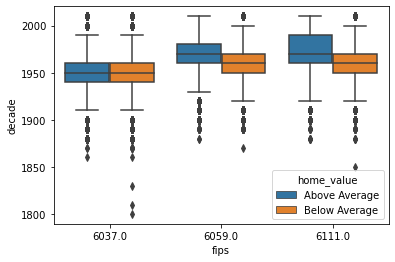

In [77]:
sns.boxplot(data=subset, y='decade', x='fips', hue ='home_value')

<AxesSubplot:xlabel='fips', ylabel='area'>

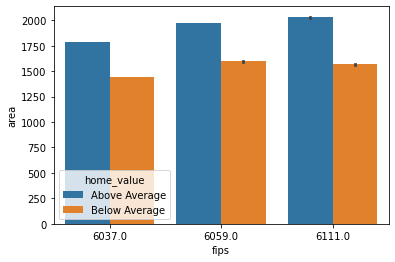

In [80]:
sns.barplot(data=subset, x='fips', y='area', hue='home_value')

In [79]:
subset.fips.value_counts()

6037.0    695282
6059.0    261963
6111.0     81224
Name: fips, dtype: int64

<AxesSubplot:xlabel='fips', ylabel='bathrooms'>

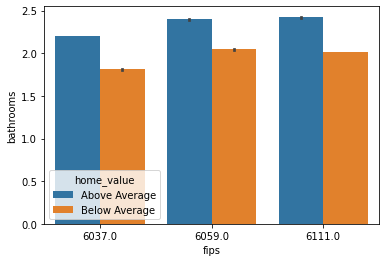

In [81]:
sns.barplot(data=subset, x='fips', y='bathrooms', hue='home_value')